In [1]:
import typing

import numpy as np
import pandas as pd

from src import load_data
from src import embeddings
from src import maps


In [2]:

df_b, df_r = load_data.load_yelp_data()
emb_r = np.lib.format.open_memmap("data/r_emb_large.npy")

In [4]:
maps.select_businesses("Susquehanna-Dauphin Station", df_b)
r1, r2 = maps.select_reviews("Susquehanna-Dauphin Station", df_r)
r1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,latitude,longitude
318,--4LY9ofH7f6_SJyNShZsA,3z2FQKEmFZ7zKuFIG1B1qw,rxqcQ3fMMFsmKFo3EsBnEQ,3,8,1,2,Cousin's is the place to go if you live in Nor...,2011-02-14 01:28:53,39.980216,-75.143111
550,CQwbB66la6MdKuNcSPa-TQ,JmqXHl4hsfzRZGDg58hxaA,XahxHmkaFOAwXix2VGRAUQ,3,0,0,0,Customer service is where it's at. Look at thi...,2009-10-14 21:06:02,39.980916,-75.153284
5445,WV62h05Wgz3Nhue4a5_Swg,gdE08fH1krgdIykCyWUj1A,rxqcQ3fMMFsmKFo3EsBnEQ,2,9,0,1,"Crowded, expensive, and not well stocked. Watc...",2011-01-13 01:09:20,39.980216,-75.143111
13254,vluCqVYDFPcia1yfUb594A,pWhaWrBMYyykptjvCO_60A,vDiD0bskBRmJMawAK2YWNg,4,0,0,0,I've come here to see about a dozen comedy sho...,2011-03-22 22:23:18,39.979879,-75.158559
13941,km16YYtexumts_tO2wd1FQ,rcxQVKzWrSuIp3ygUENB1w,rxqcQ3fMMFsmKFo3EsBnEQ,4,4,0,2,The supermarket itself is vey cheap and extrem...,2010-07-11 20:26:43,39.980216,-75.143111


In [3]:
import tkinter
import tkintermapview

CITY_CENTER = 39.9526, -75.1652

root_tk = tkinter.Tk()
root_tk.geometry(f"{800}x{600}")
root_tk.title("BU Project")

# create map widget
map_widget = tkintermapview.TkinterMapView(root_tk, width=800, height=600, corner_radius=0)
map_widget.place(relx=0.5, rely=0.5, anchor=tkinter.CENTER)
map_widget.set_position(*CITY_CENTER)
map_widget.set_zoom(10)

for row in df_b.itertuples(index=False):
    marker = map_widget.set_marker(row.latitude, row.longitude, row.name)

root_tk.mainloop()

KeyboardInterrupt: 

In [4]:
e1 = embeddings.embedding("brick")
df_r["d1"] = emb_r @ e1
df_r.sort_values("d1", ascending=False).head(20)[["stars", "text", "d1"]]

,stars,text,d1
823453,5,Brickwall is Phillys newest casual bar. Great ...,0.372336
880968,5,"Fast, efficient, and overall great quality. Fu...",0.370213
875410,4,Brick brunch - worth it! They serve you muffin...,0.366058
901638,2,Brick could be a lot better. I went there for ...,0.351817
11441,5,The brick build atop Pennsylvania field stones...,0.347256
259426,1,Replaced exterior stack pipe. In the process t...,0.338935
110269,3,"Brick oven pizza , quick, slices , old city",0.332484
123284,2,I decided to try the brick house grilled chees...,0.331618
956854,5,When Mike evaluated our home and bricks he pro...,0.330046
920415,5,I had dinner at Brick last night for a girls n...,0.329503


In [11]:
d = maps.dist(
    np.array(df_r["latitude"]), 
    np.array(df_r["longitude"]), 
    39.956944, 
    -75.201944,
)
df_r_close_early = df_r[(d < 1.0) & (df_r["date"] < pd.to_datetime("10/03/2015"))]

In [13]:
df_r_close_early.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,latitude,longitude,d1
28,UD0AKHQQHSzYsbCkdM7Xrw,Au2RZKzmrr75h2bBpb60oA,tJCnUtGdyPyOGt5kudLrTA,4,0,0,0,I'm giving this joint 4 stars because they hav...,2012-03-30 20:57:29,39.957030,-75.203031,0.108352
50,C63d7kiqdlTya-2pfKmong,5zVOhYaGoCadhC55eJ2r7Q,7ENaqdbPmYGSFaa8tXZzFA,2,0,1,0,I don't think they have enough staffs here. Al...,2015-05-26 14:50:03,39.955324,-75.194182,0.043022
54,hozoa1DsTCjpz4UC8YGsNw,ndgHYecgAWEqtjnjE7LtfA,MMRRS6YhVRx_iN5-JhMRYg,4,0,0,0,The new Han Dynasty took over the spot where t...,2012-10-08 15:29:44,39.956711,-75.197103,0.101154
72,qjdMlELzt7SzneQFfwe7HA,FncS5xs9sE1weGrYV4aJgg,eaV07HGOcyb27XobHVl8LQ,3,0,0,0,I regularly go to student salons for hair cuts...,2011-11-30 05:17:05,39.955982,-75.201914,0.034832
86,xZ-hLh7lC1lX-pC8rW3HlA,qebLK4vwNUmv-Bqk3b2hTg,c8rjE6NcfeyzLB_aU1GdMA,3,1,0,1,Went here before a show we were seeing in the ...,2009-10-13 23:05:04,39.954816,-75.183607,0.113680


<Axes: xlabel='date', ylabel='d1'>

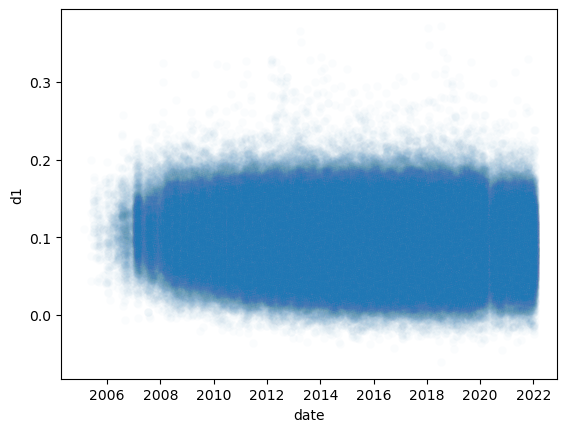

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt.hexbin(df_r["date"].dt.year * 365 + df_r["date"].dt.day_of_year, df_r["d1"])
sns.scatterplot(df_r, x="date", y="d1", alpha=0.02)

In [71]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14576 entries, 0 to 14575
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   14576 non-null  object 
 1   name          14576 non-null  object 
 2   address       14050 non-null  object 
 3   city          14576 non-null  object 
 4   state         14576 non-null  object 
 5   postal_code   14568 non-null  Int64  
 6   latitude      14576 non-null  float64
 7   longitude     14576 non-null  float64
 8   stars         14576 non-null  float64
 9   review_count  14576 non-null  int64  
 10  is_open       14576 non-null  bool   
 11  attributes    13406 non-null  object 
 12  categories    14567 non-null  object 
 13  hours         11792 non-null  object 
dtypes: Int64(1), bool(1), float64(3), int64(1), object(8)
memory usage: 1.5+ MB


In [ ]:

# {type(obj) for obj in df_b["hours"]}

In [75]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14576 entries, 0 to 14575
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   14576 non-null  object 
 1   name          14576 non-null  object 
 2   address       14050 non-null  object 
 3   city          14576 non-null  object 
 4   state         14576 non-null  object 
 5   postal_code   14568 non-null  Int64  
 6   latitude      14576 non-null  float64
 7   longitude     14576 non-null  float64
 8   stars         14576 non-null  float64
 9   review_count  14576 non-null  int64  
 10  is_open       14576 non-null  bool   
 11  attributes    13406 non-null  object 
 12  categories    14567 non-null  object 
 13  hours         11792 non-null  object 
dtypes: Int64(1), bool(1), float64(3), int64(1), object(8)
memory usage: 1.5+ MB


In [70]:
df_b["hours"][0]

{'Monday': (numpy.datetime64('1970-01-01T07:00'),
  numpy.datetime64('1970-01-01T20:00')),
 'Tuesday': (numpy.datetime64('1970-01-01T07:00'),
  numpy.datetime64('1970-01-01T20:00')),
 'Wednesday': (numpy.datetime64('1970-01-01T07:00'),
  numpy.datetime64('1970-01-01T20:00')),
 'Thursday': (numpy.datetime64('1970-01-01T07:00'),
  numpy.datetime64('1970-01-01T20:00')),
 'Friday': (numpy.datetime64('1970-01-01T07:00'),
  numpy.datetime64('1970-01-01T21:00')),
 'Saturday': (numpy.datetime64('1970-01-01T07:00'),
  numpy.datetime64('1970-01-01T21:00')),
 'Sunday': (numpy.datetime64('1970-01-01T07:00'),
  numpy.datetime64('1970-01-01T21:00'))}

In [ ]:
import json

# df_b["attributes_2"] = df_b["attributes"].apply(lambda line: json.loads(line.replace("\\", "").replace("\"u'", "\"").replace("'\"", "\"").replace("'", "\"")))
# df_b["attributes"][0]
# set(k for d in df_b for k in d.keys())
df_b["attributes"]

JSONDecodeError: Expecting ',' delimiter: line 1 column 122 (char 121)